In [1]:
import pandas as pd
import numpy as np
import Path
import os

In [2]:
import mplcatppuccin
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from mplcatppuccin.palette import load_color
mpl.style.use(["ggplot", "mocha"])
color = load_color("mocha", "green")

In [3]:
base_dir = "/home/sugam/Work/20-29 Deep Learning/22 Projects/Optimization of Energy Using AIML/data/raw/Building_59/Bldg59_clean data/"
path1 = os.path.join(base_dir,"02 Outdoor Environmental Data")
path2 = os.path.join(base_dir,"01 Energy Usage Data")
print("Two datasets to be merge--->",os.listdir(path1),os.listdir(path2))

Two datasets to be merge---> ['site_weather.csv'] ['energy_usage.csv']


In [7]:
pd.merge("rtu_sa_t_sp.csv",rtu_sa_t.csv,on="date",how="inner")

NameError: name 'rtu_sa_t_sp' is not defined

In [4]:
data_for_enviromental = os.listdir(path1)
data_for_energy_usage = os.listdir(path2)
env_df = pd.read_csv(os.path.join(path1,data_for_enviromental[0]))
eng_df = pd.read_csv(os.path.join(path2,data_for_energy_usage[0])).drop("Unnamed: 6", axis=1)
eng_df.head()

,date,Mis_elect_load_south,light_load_south,Mis_elect_load_north,hvac_load_north,hvac_load_south
0,2018/1/1 1:00,1.2,0.2,7.5,37.400002,19.500000
1,2018/1/1 1:15,1.3,0.2,6.8,37.500000,19.889999
2,2018/1/1 1:30,1.1,0.2,7.4,38.000000,19.299999
3,2018/1/1 1:45,1.2,0.2,7.7,37.200001,18.889999
4,2018/1/1 2:00,1.1,0.2,7.3,37.400002,24.700001


In [5]:
env_df["date"] = pd.to_datetime(env_df["date"])
eng_df["date"] = pd.to_datetime(eng_df["date"])
env_df.head()

,date,air_temp_sensor_1,air_temp_sensor_2,dew_point_temperature_sensor_2,relative_humidity_sensor_1,solar_radiation_sensor_1
0,2018-01-01 00:00:00,11.64,11.51,`,79.07,86.70
1,2018-01-01 00:15:00,11.49,11.42,8.14,80.10,45.88
2,2018-01-01 00:30:00,11.59,11.51,8.21,79.92,51.62
3,2018-01-01 00:45:00,11.44,11.41,8.11,80.20,21.43
4,2018-01-01 01:00:00,11.12,11.15,8.04,81.50,6.45


In [6]:
df = env_df.merge(eng_df,on="date",how="left")
df.index = df["date"]
df.drop(["date","light_load_south","Mis_elect_load_north","hvac_load_north","hvac_load_south"],axis=1,inplace=True)

In [7]:
# Converting dew_point_temperature_sensor_2 into float by replacing the '`' value to its preceeding value
df["dew_point_temperature_sensor_2"] = (df["dew_point_temperature_sensor_2"]
                                        .replace(to_replace='`',value=8.14)
                                        .astype(float)
                                       )

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105217 entries, 2018-01-01 00:00:00 to 2021-01-01 00:00:00
Data columns (total 6 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   air_temp_sensor_1               105217 non-null  float64
 1   air_temp_sensor_2               105217 non-null  float64
 2   dew_point_temperature_sensor_2  105217 non-null  float64
 3   relative_humidity_sensor_1      105217 non-null  float64
 4   solar_radiation_sensor_1        105217 non-null  float64
 5   Mis_elect_load_south            101485 non-null  float64
dtypes: float64(6)
memory usage: 5.6 MB


In [9]:
# Check for the null values per column
df.isnull().sum(axis=0)

air_temp_sensor_1                    0
air_temp_sensor_2                    0
dew_point_temperature_sensor_2       0
relative_humidity_sensor_1           0
solar_radiation_sensor_1             0
Mis_elect_load_south              3732
dtype: int64

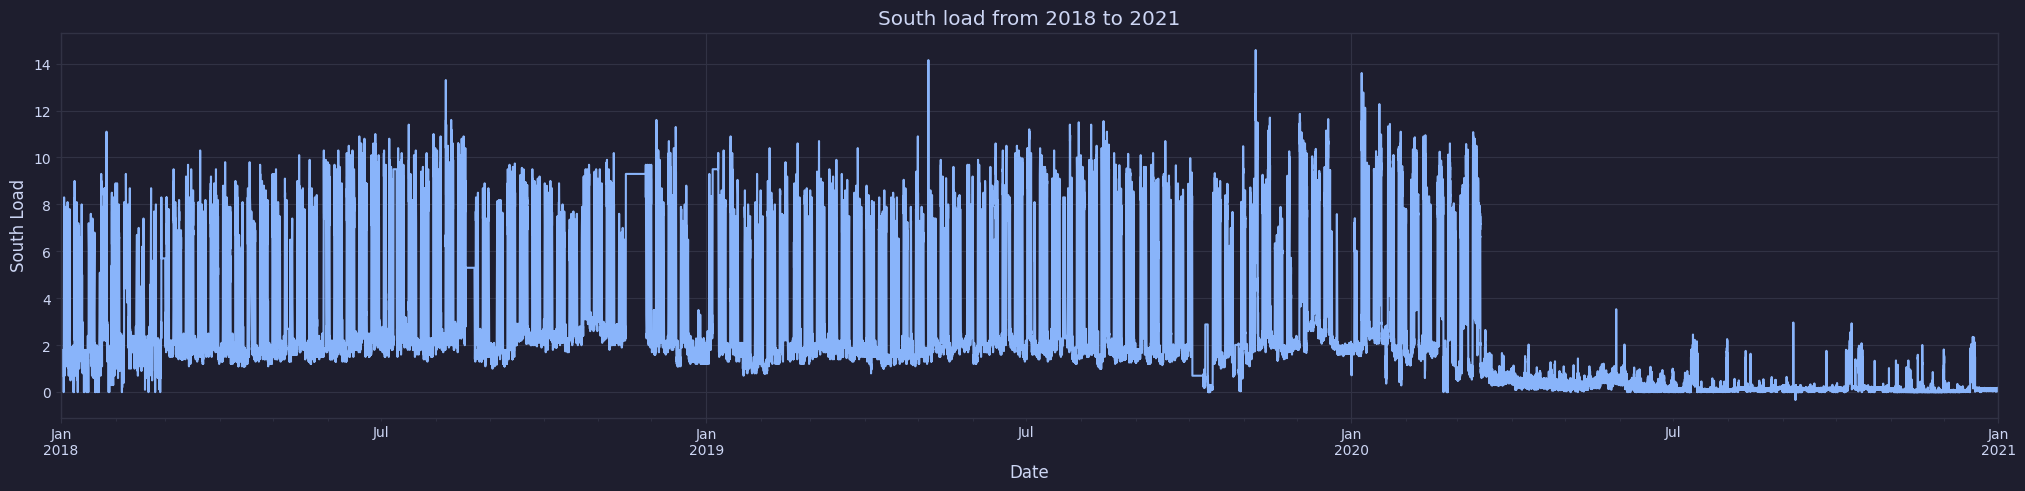

In [10]:
df.fillna(method="backfill",inplace=True)
df["Mis_elect_load_south"].plot(figsize=(25,5),
                                xlabel="Date",
                                ylabel="South Load",
                                title="South load from 2018 to 2021");

Visualizing values between 1 week of interval from July 1st 2019 to July 7th 2019

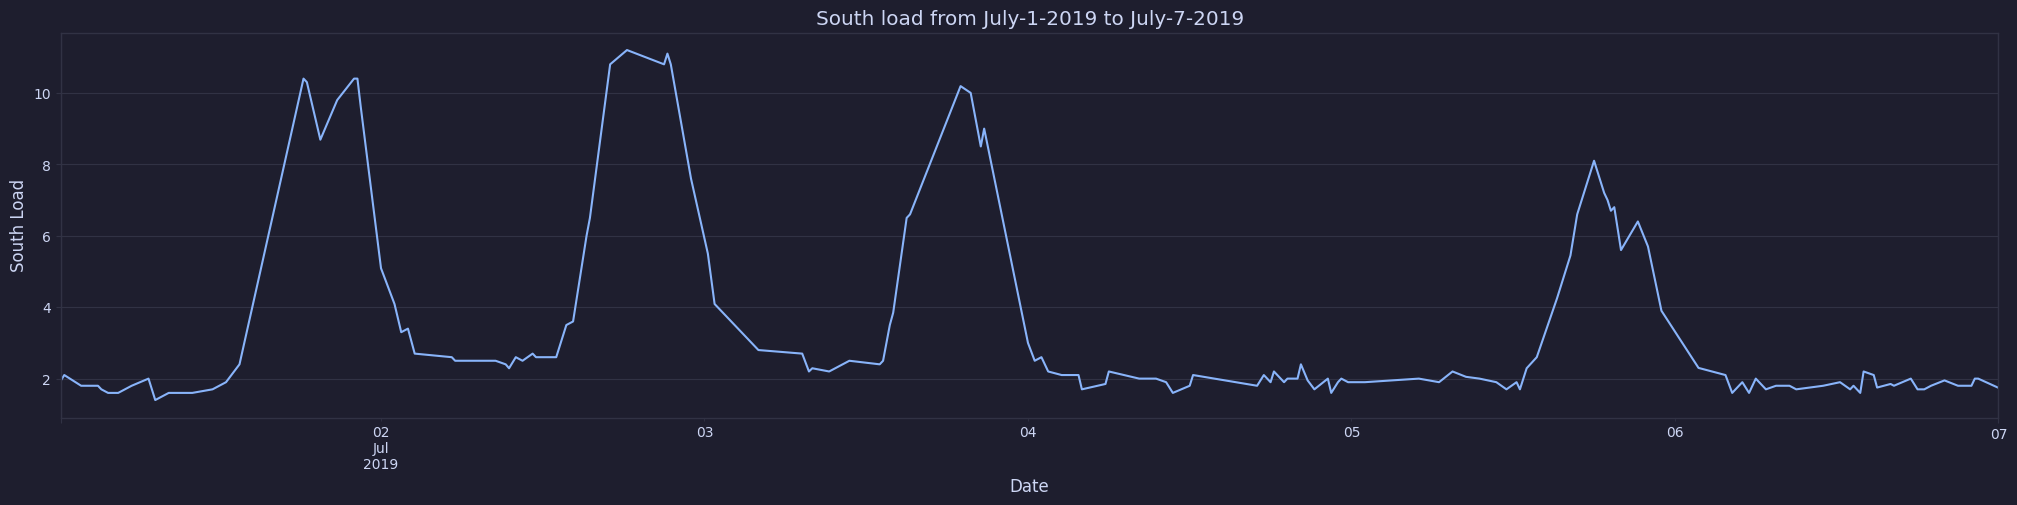

In [11]:
df.loc[(df.index >"07-01-2019") & (df.index<= "07-07-2019")]["Mis_elect_load_south"]\
                                                                  .plot(figsize=(25,5),
                                                                  xlabel="Date",
                                                                  ylabel="South Load",
                                                                  title="South load from July-1-2019 to July-7-2019");

The below code represents how we can fill na with the mean values by month

In [12]:
# import pandas as pd
# import datetime as dt

# # Sample Data:
# df = pd.DataFrame({'date': ['2000-01-02', '2000-01-02', '2000-01-15', '2000-01-27', 
#                             '2000-06-03', '2000-06-29', '2000-06-15', '2000-06-29',
#                             '2001-01-02', '2001-01-02', '2001-01-15', '2001-01-27'],
#                    'val':[5,7,None,4,
#                           8,1,None,9,
#                           2,3,None,7]})

# # Some convert to datetime
# df['date'] = pd.to_datetime(df['date'])
# df['year'] = df['date'].dt.year
# df['month'] = df['date'].dt.month

# # Create mean value:
# tem = df.groupby(['year', 'month'])[['val']].mean().reset_index()
# tem.rename(columns={'val': 'val_mean'}, inplace=True)
# tem

# # Merge and fill NA:
# df = pd.merge(df, tem, how='left', on=['year', 'month'])
# df.loc[df['val'].isna(),'val'] = df['val_mean']

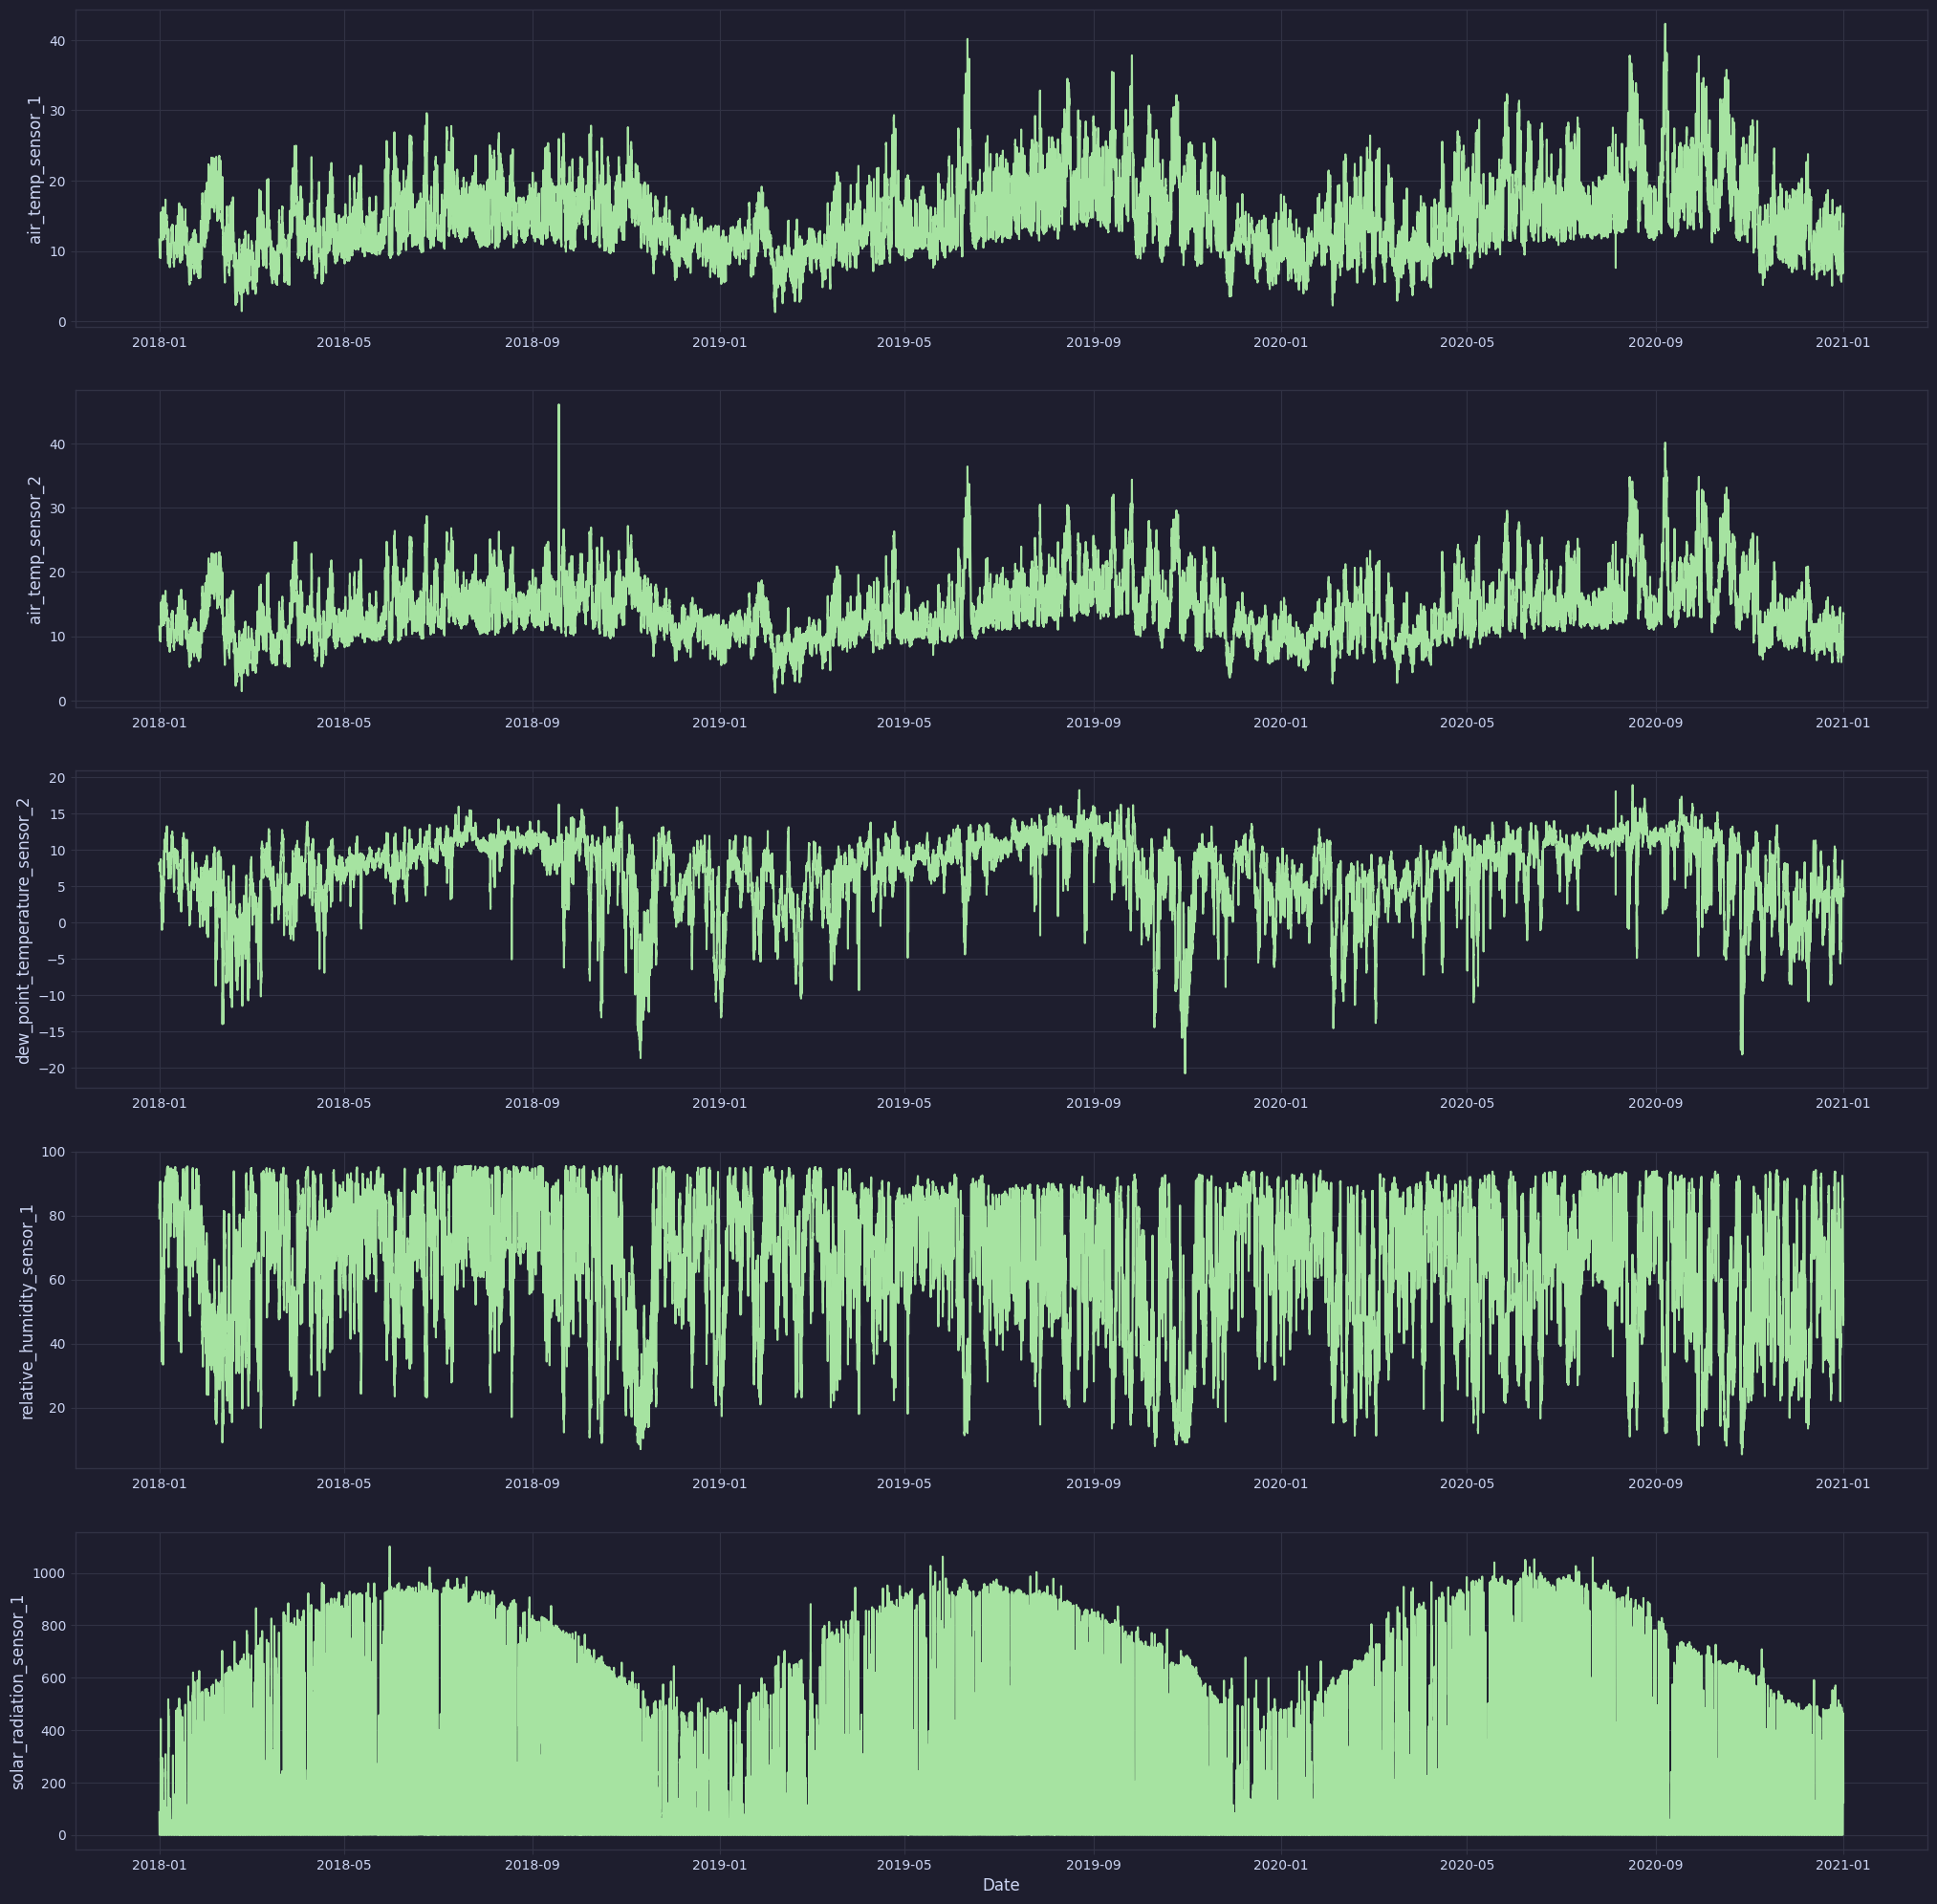

In [13]:
fig,ax = plt.subplots(5,1,figsize=(25,25))
ax[0].plot(df.index,df["air_temp_sensor_1"],color=color)
ax[0].set_ylabel("air_temp_sensor_1")

ax[1].plot(df.index,df["air_temp_sensor_2"],color=color)
ax[1].set_ylabel("air_temp_sensor_2")

ax[2].plot(df.index,df["dew_point_temperature_sensor_2"],color=color)
ax[2].set_ylabel("dew_point_temperature_sensor_2")

ax[3].plot(df.index,df["relative_humidity_sensor_1"],color=color)
ax[3].set_ylabel("relative_humidity_sensor_1")

ax[4].plot(df.index,df["solar_radiation_sensor_1"],color=color)
ax[4].set_ylabel("solar_radiation_sensor_1")
ax[4].set_xlabel("Date")

# plt.savefig("01_distribution.jpg",bbox_inches="tight",
#            dpi=300)
plt.show()

In [14]:
def create_features(dataframe):
    dataframe["month"] = df.index.month
    dataframe["day"] = df.index.day
    dataframe["dayofyear"] = df.index.dayofyear
    dataframe["quarter"] = df.index.quarter
    dataframe["hour"] = df.index.hour
    df["isWeekDay"] = df.index.weekday > 4 # if the day is friday till sunday then True else False
    df["isWeekDay"].map(lambda x: 1 if x == True else 0)
    return dataframe
df = create_features(df)
df.head()

,air_temp_sensor_1,air_temp_sensor_2,dew_point_temperature_sensor_2,relative_humidity_sensor_1,solar_radiation_sensor_1,Mis_elect_load_south,month,day,dayofyear,quarter,hour,isWeekDay
date,,,,,,,,,,,,
2018-01-01 00:00:00,11.64,11.51,8.14,79.07,86.70,1.2,1,1,1,1,0,False
2018-01-01 00:15:00,11.49,11.42,8.14,80.10,45.88,1.2,1,1,1,1,0,False
2018-01-01 00:30:00,11.59,11.51,8.21,79.92,51.62,1.2,1,1,1,1,0,False
2018-01-01 00:45:00,11.44,11.41,8.11,80.20,21.43,1.2,1,1,1,1,0,False
2018-01-01 01:00:00,11.12,11.15,8.04,81.50,6.45,1.2,1,1,1,1,1,False


<Axes: >

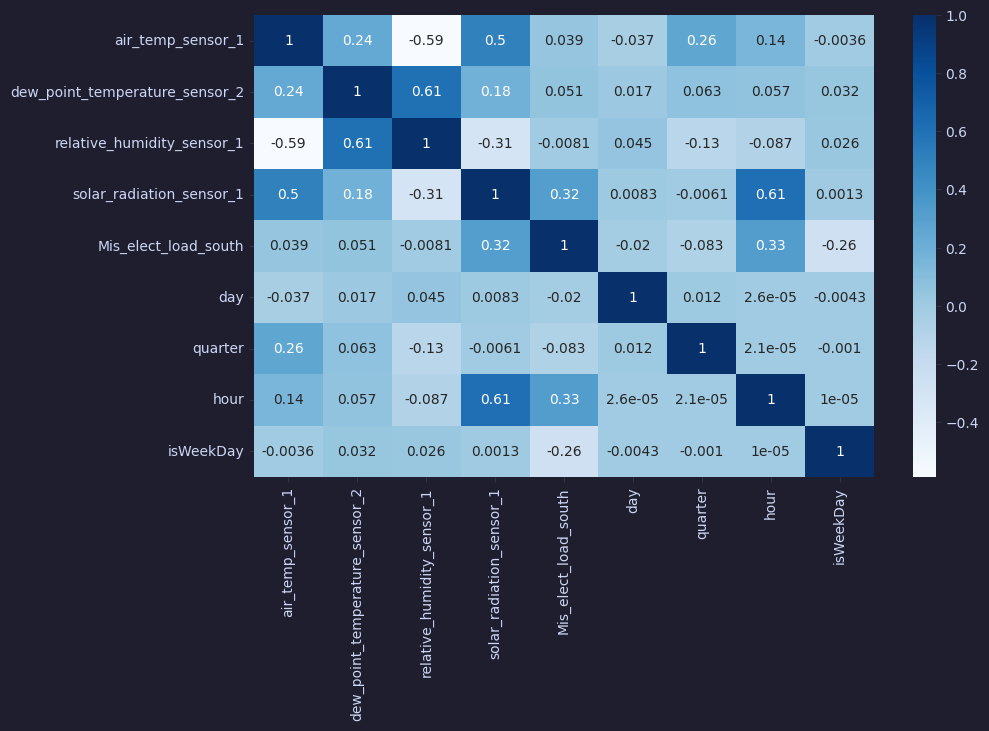

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

In [16]:
df.drop(["month","air_temp_sensor_2","dayofyear"],axis=1,inplace=True)

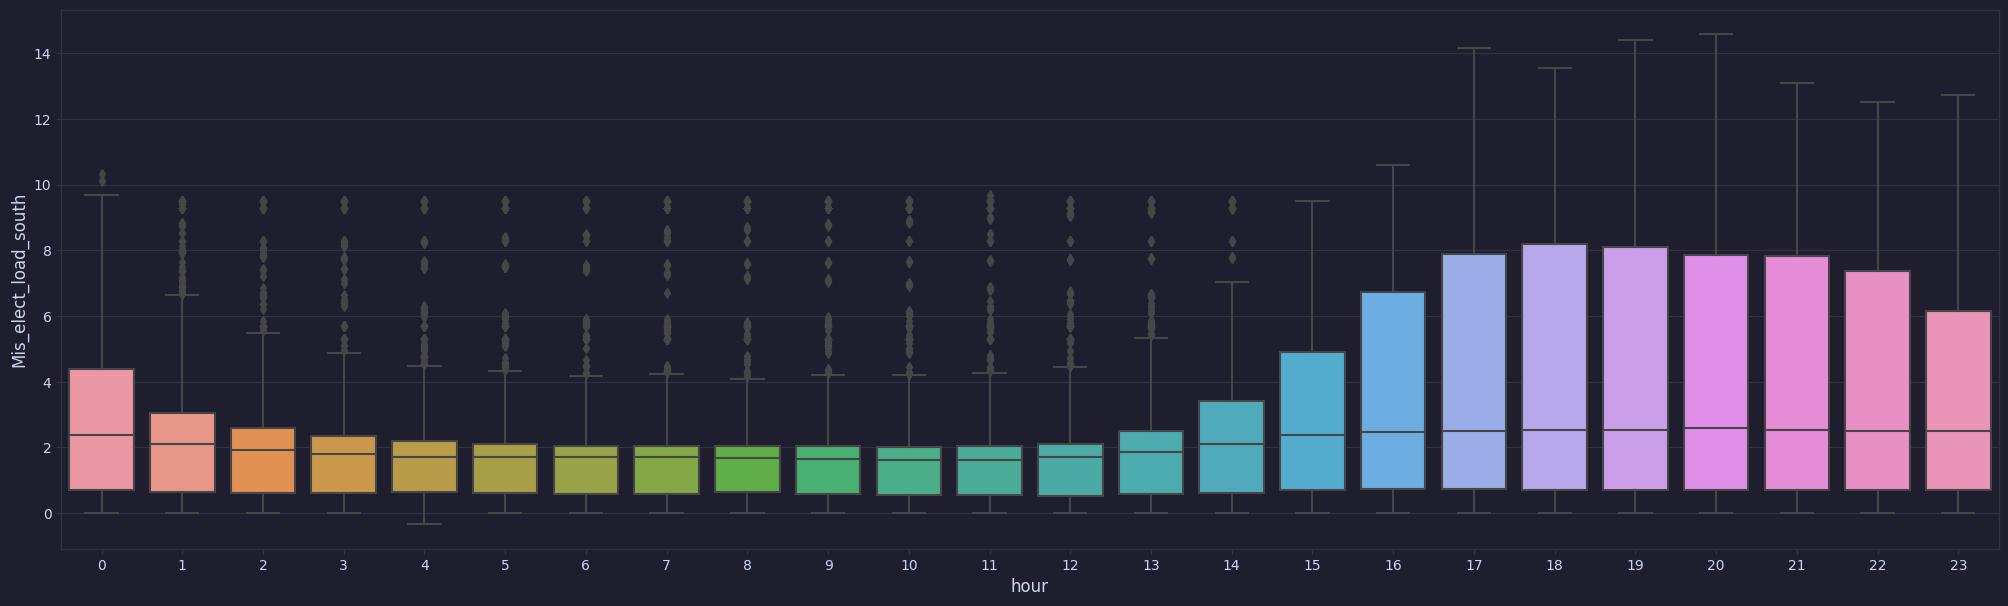

In [17]:
plt.figure(figsize=(25,7))
sns.boxplot(data = df, x = "hour",y="Mis_elect_load_south");